## Results module tutorial

This tutorial shows how to use the results function to generate figures based on the classification results obtained after training a ML model.

Importing modules:

In [1]:
import sys
import numpy as np
from pmtool.GenerateResultBox import GenerateResultBox

Generating a random dataset for test purpose representing train and test 'true' labels as well as 'predictions from some model' on test and external test sets:

In [2]:
train_labels = [int(np.round(np.random.uniform(low=0, high=1))) for i in range(100)]
train_predictions = [np.random.uniform(low=0, high=1) for i in range(100)]
test_labels = [int(np.round(np.random.uniform(low=0, high=1))) for i in range(50)]
test_predictions = [np.random.uniform(low=0, high=1) for i in range(50)]
external_labels = [int(np.round(np.random.uniform(low=0, high=1))) for i in range(50)]
external_predictions = [np.random.uniform(low=0, high=1) for i in range(50)]

Creating the result generation object:

In [3]:
result_generation = GenerateResultBox(train_labels=train_labels, 
                                      train_predictions=train_predictions, 
                                      test_labels=test_labels,
                                      test_predictions=test_predictions,
                                      external_labels=external_labels,
                                      external_predictions=external_predictions)

Exploring the scores on train set:

In [7]:
result_generation.get_results("train")

,auc,balanced accuracy,precision,recall,f1 score
train,0.427173,0.522236,0.587302,0.649123,0.616667


Printing out the scores with confidence intervals (CI) for the train, test, and external test sets:

In [4]:
result_generation.get_stats_with_ci("train")

,auc,balanced accuracy,precision,recall,f1 score
train,"0.43 CI [0.31,0.54]","0.52 CI [0.43,0.62]","0.59 CI [0.47,0.71]","0.65 CI [0.53,0.78]","0.62 CI [0.51,0.71]"


In [5]:
result_generation.get_stats_with_ci("test")

,auc,balanced accuracy,precision,recall,f1 score
test,"0.55 CI [0.38,0.71]","0.52 CI [0.39,0.64]","0.56 CI [0.40,0.70]","0.74 CI [0.56,0.90]","0.63 CI [0.47,0.76]"


In [4]:
result_generation.get_stats_with_ci("external")

,auc,balanced accuracy,precision,recall,f1 score
external,"0.46 CI [0.30,0.63]","0.47 CI [0.38,0.57]","0.43 CI [0.00,0.80]","0.12 CI [0.00,0.26]","0.18 CI [0.00,0.36]"


Testing different functionalities of the confusion matrix generation:

Normalized confusion matrix


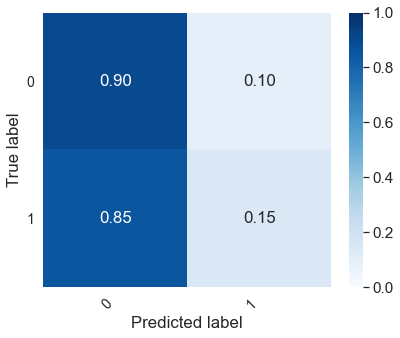

In [5]:
fig_train = result_generation.print_confusion_matrix("train",["0","1"])

Confusion matrix, without normalization


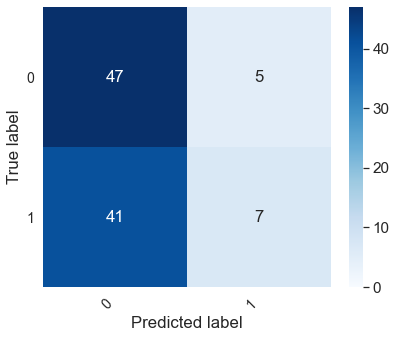

In [6]:
fig_train = result_generation.print_confusion_matrix("train",["0","1"],normalize=False)

Confusion matrix, without normalization


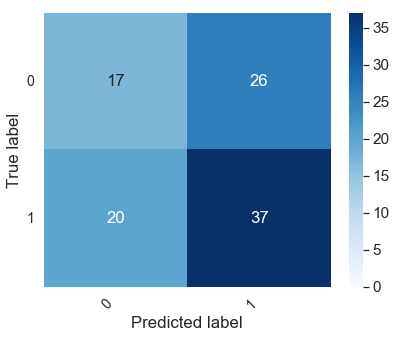

In [12]:
fig_train = result_generation.print_confusion_matrix("train",["0","1"],
                                                     normalize=False,
                                                     save_fig=True)

Plotting the ROC curves on the 3 sets (train, test, external test):

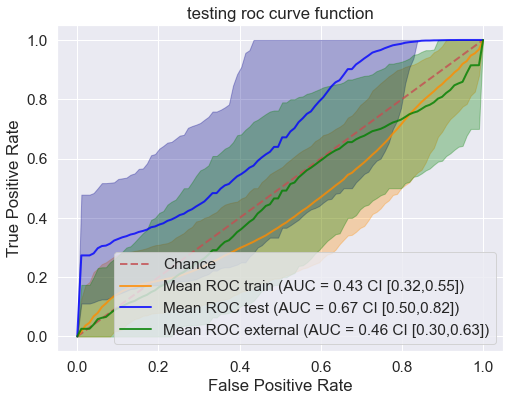

'testing roc curve function done'

In [7]:
result_generation.plot_roc_auc_ci(title ="testing roc curve function")